In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1)
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data,1)
y1 = torch.ones(100)
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),).type(torch.LongTensor)

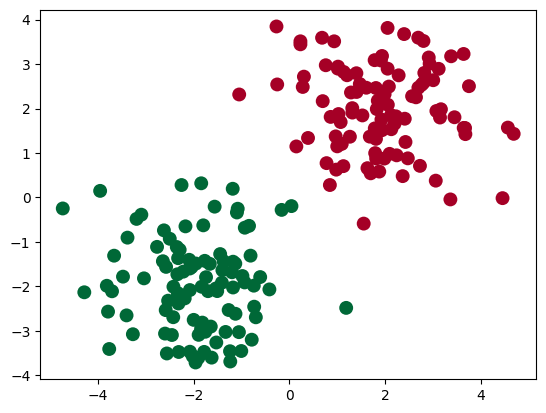

In [4]:
plt.scatter(x.numpy()[:,0],x.numpy()[:,1],c = y.numpy(),s = 100,lw = 0,cmap = 'RdYlGn')
plt.show()

In [5]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
    
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [6]:
net = Net(2,10,2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


In [7]:
plt.ion()
plt.show()

In [8]:
optimizer = torch.optim.SGD(net.parameters(),lr = 0.02)
loss_func = torch.nn.CrossEntropyLoss()

C:\Users\a1523\AppData\Local\Temp\ipykernel_21304\3083535942.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prediction = torch.max(F.softmax(out),1)[1]


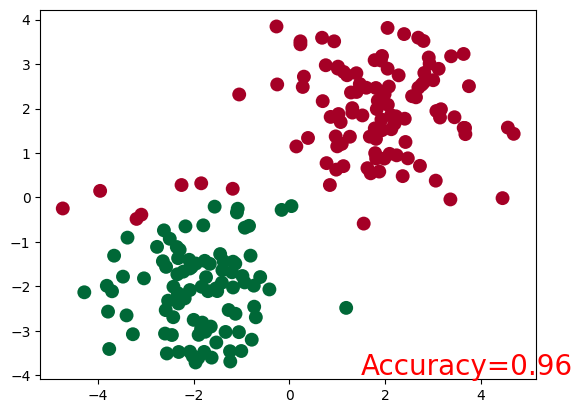

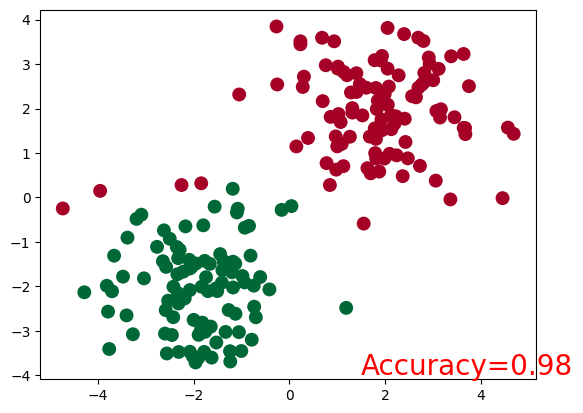

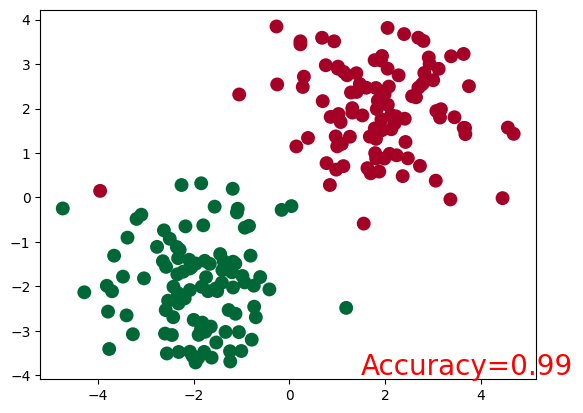

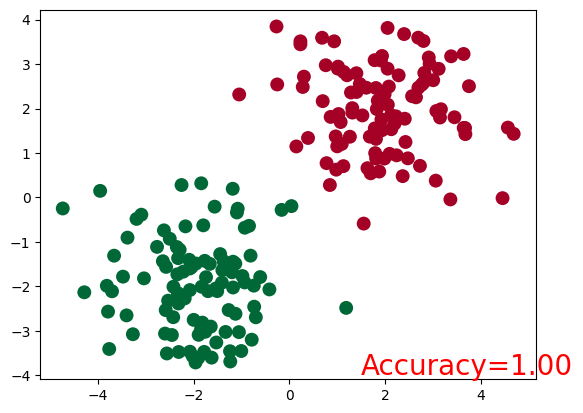

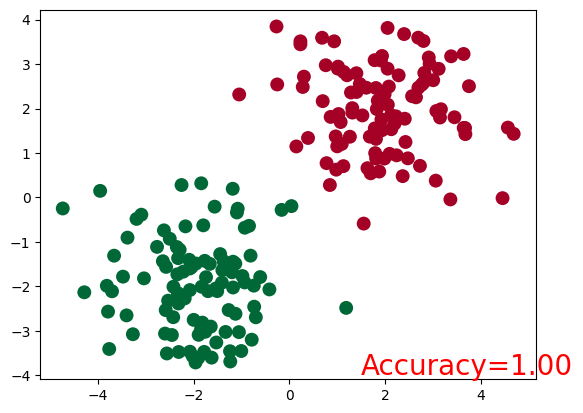

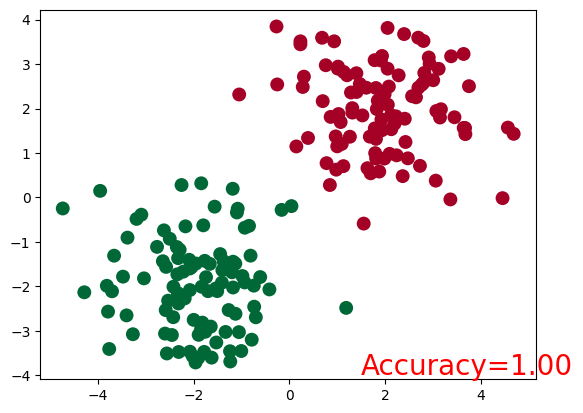

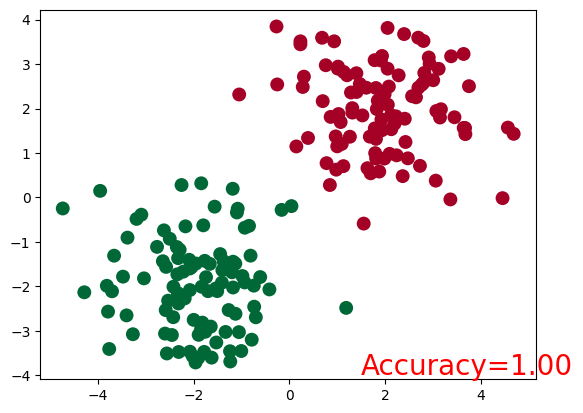

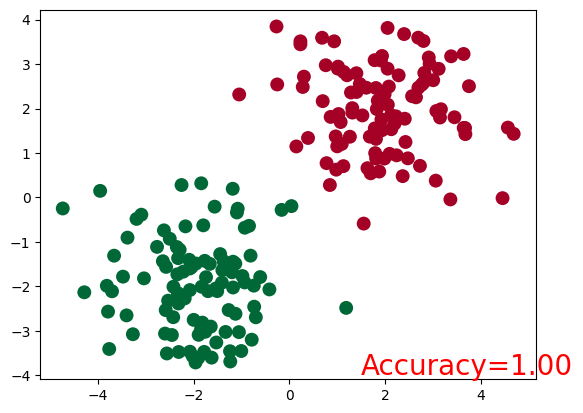

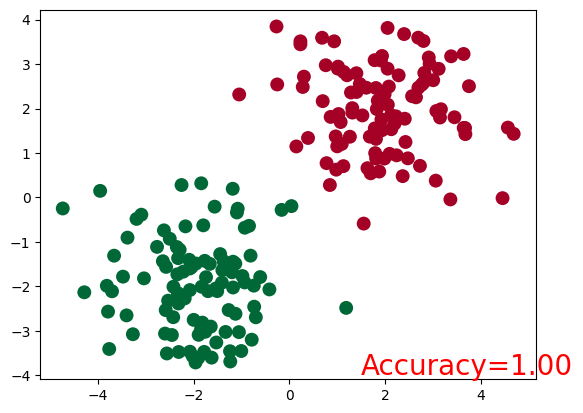

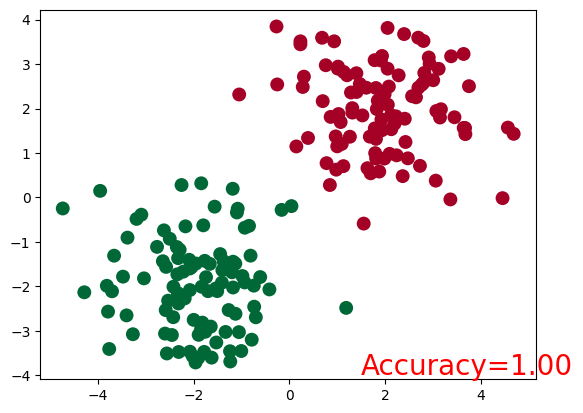

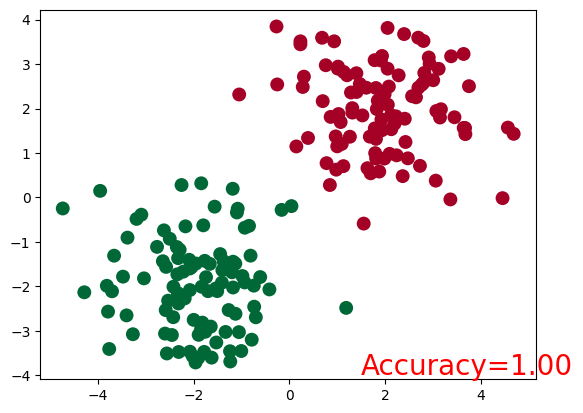

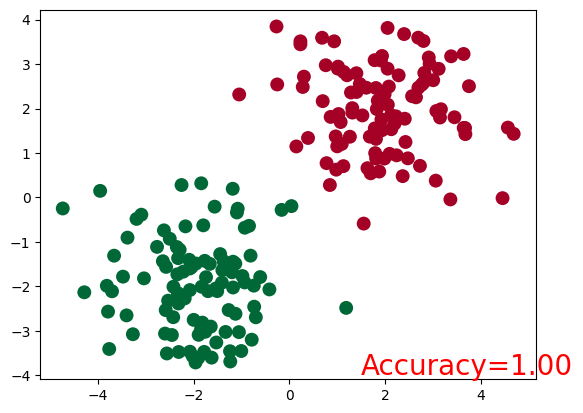

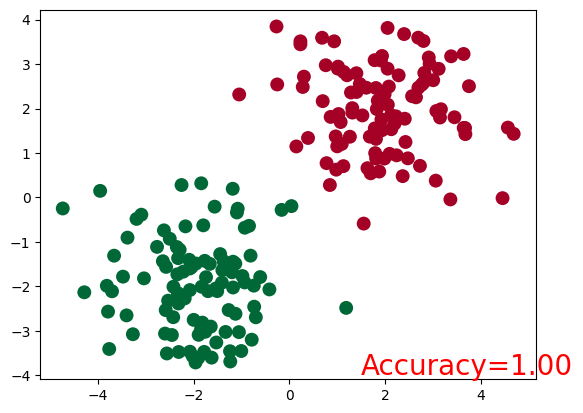

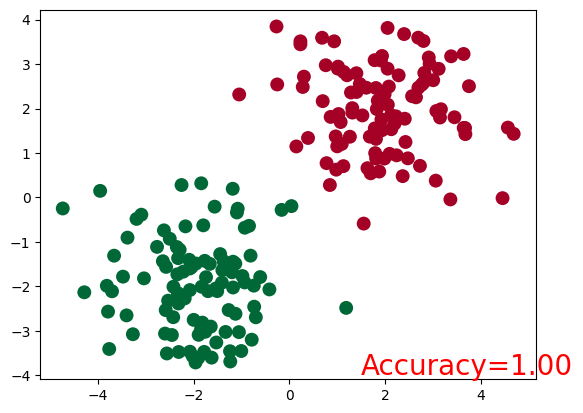

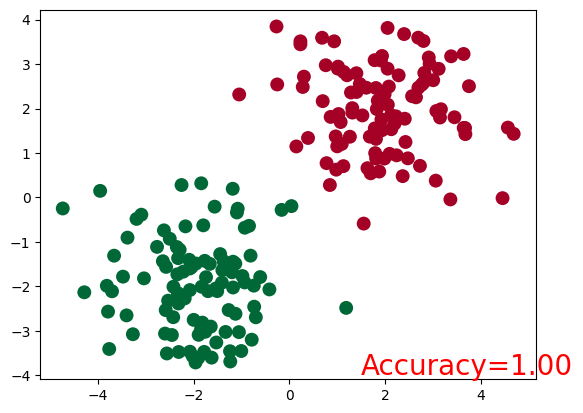

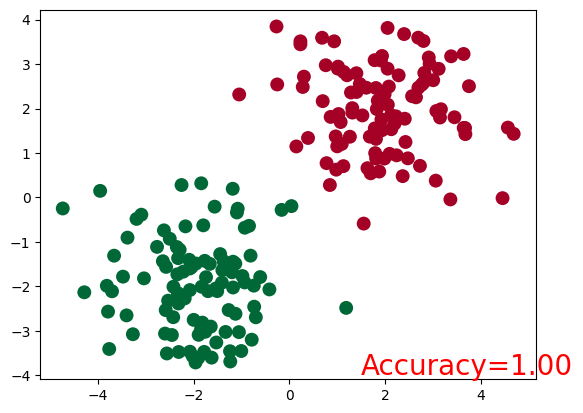

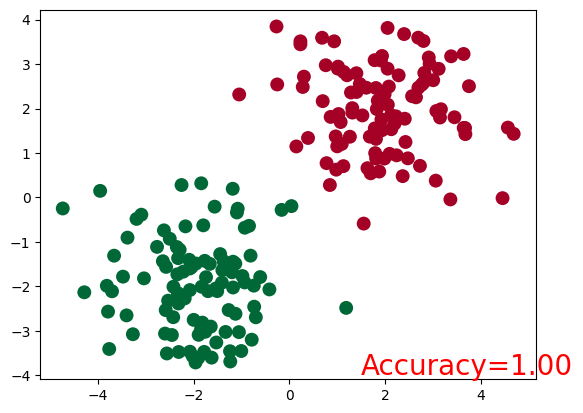

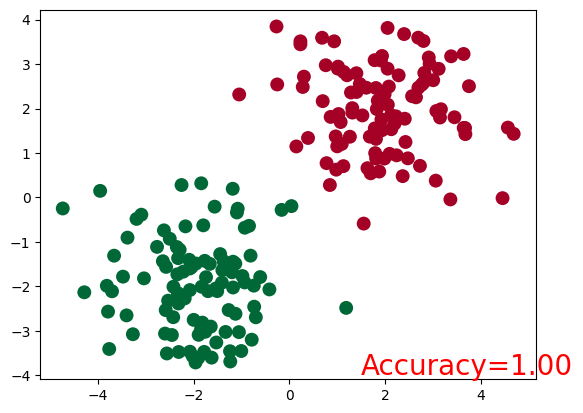

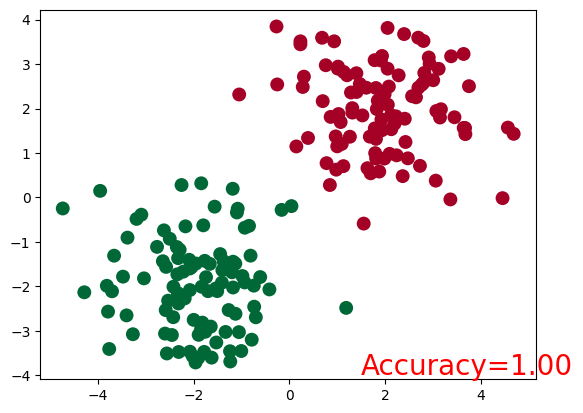

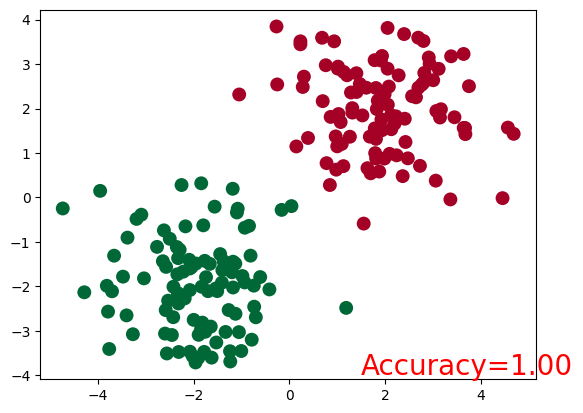

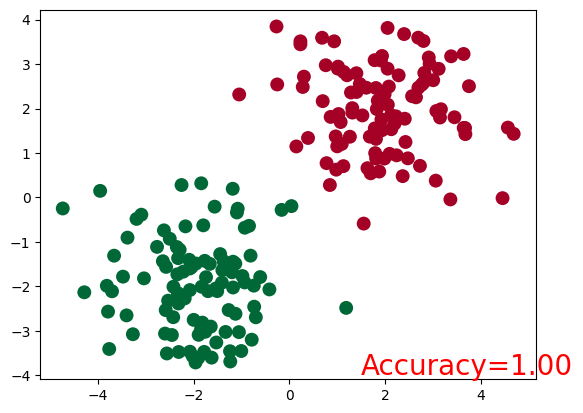

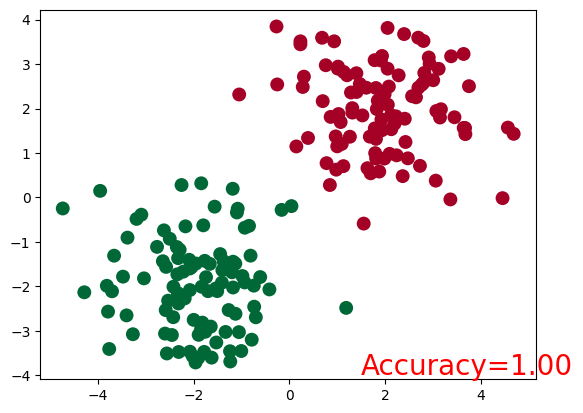

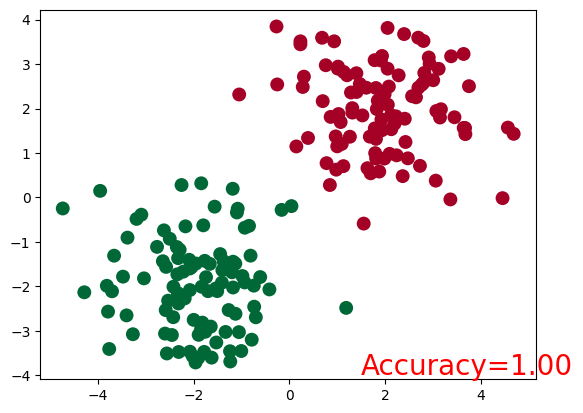

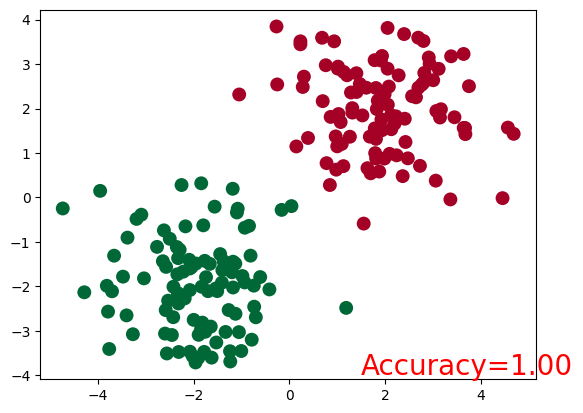

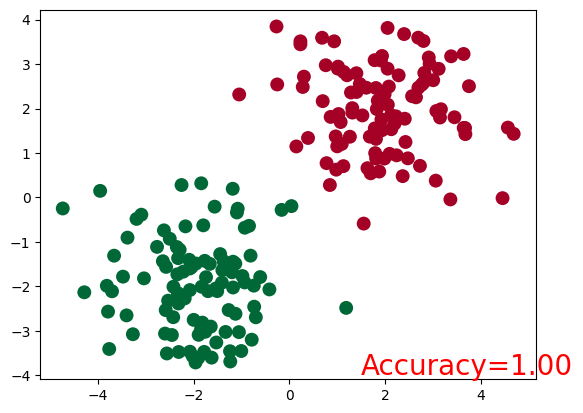

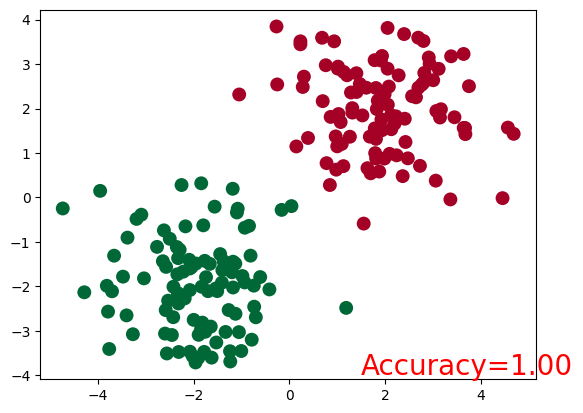

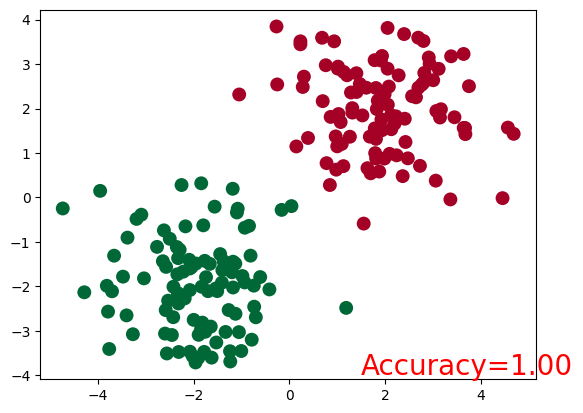

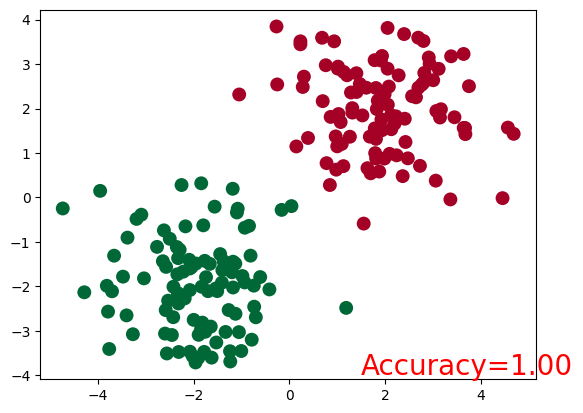

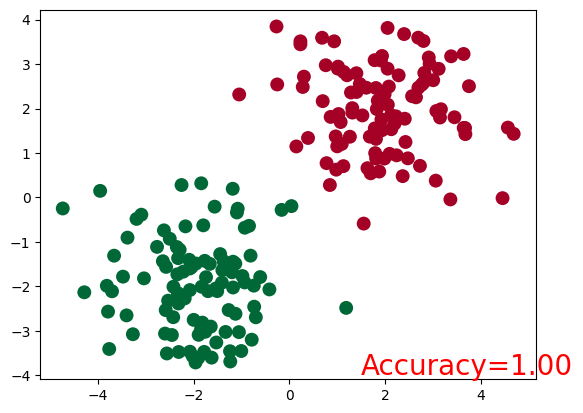

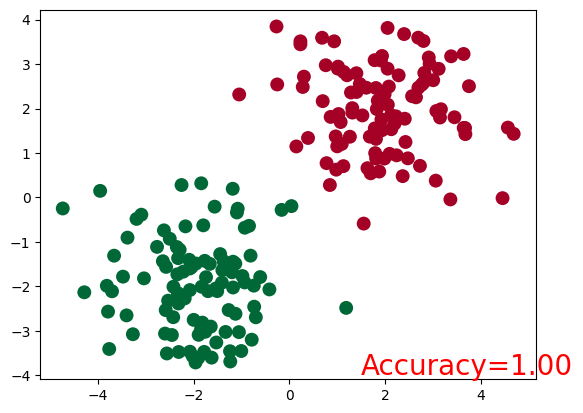

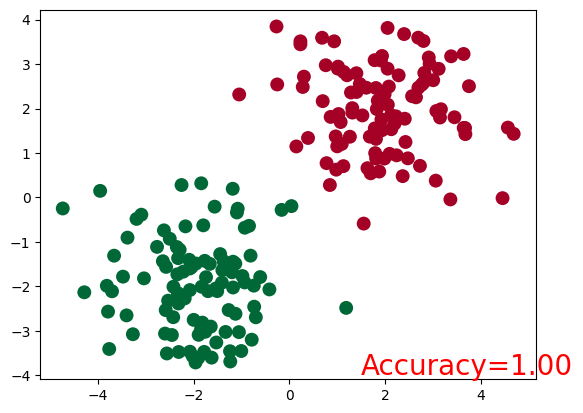

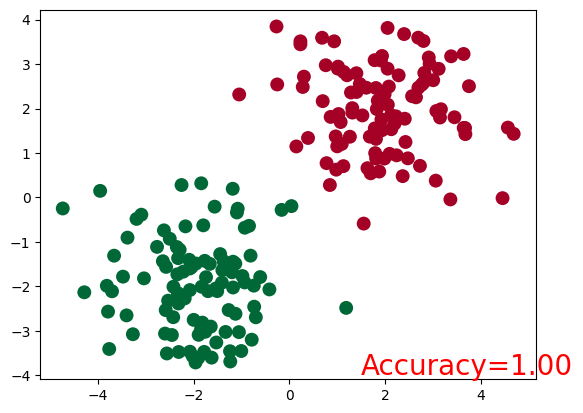

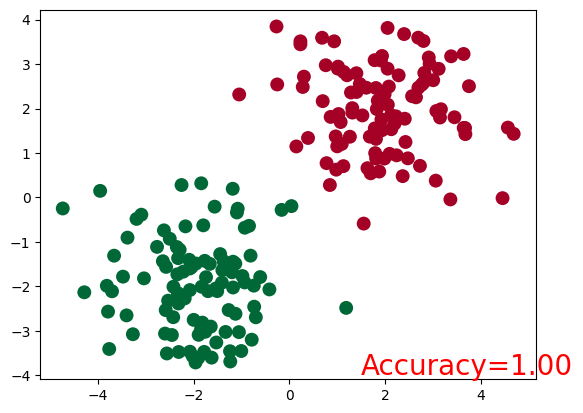

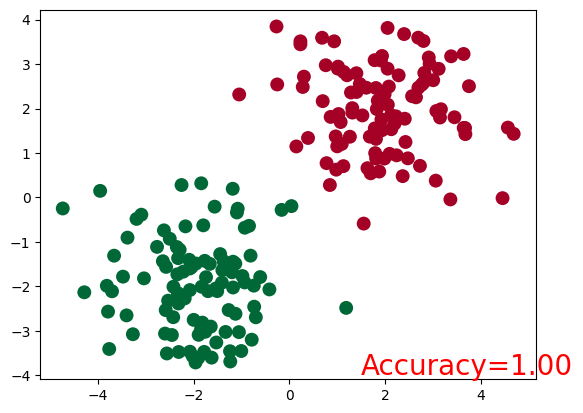

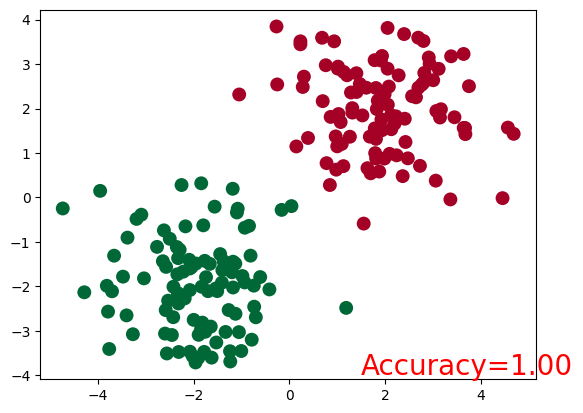

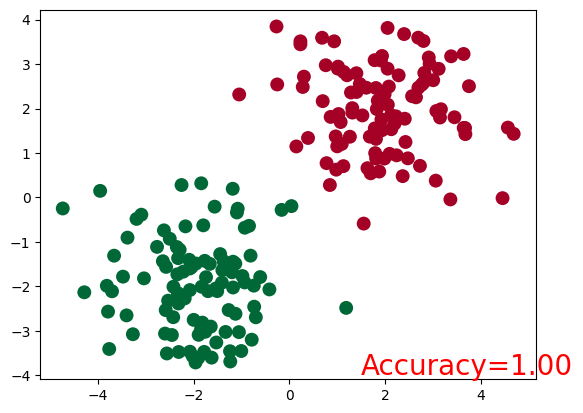

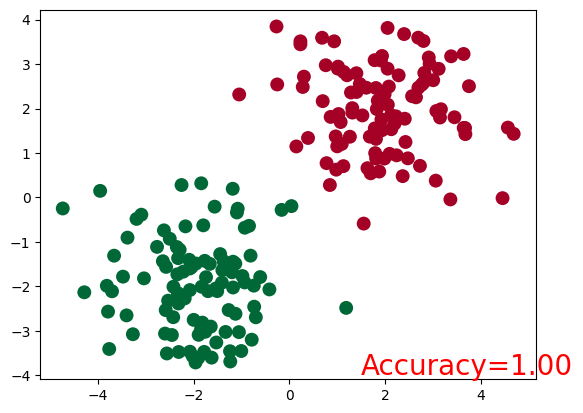

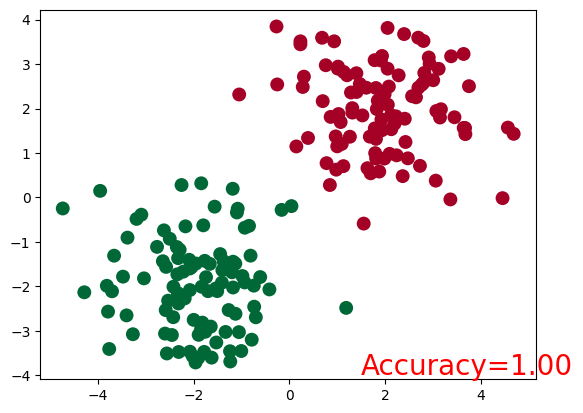

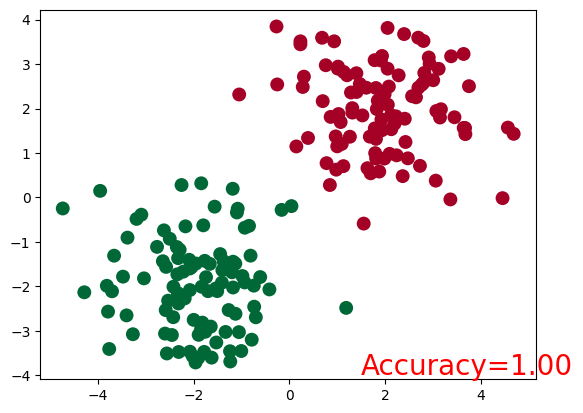

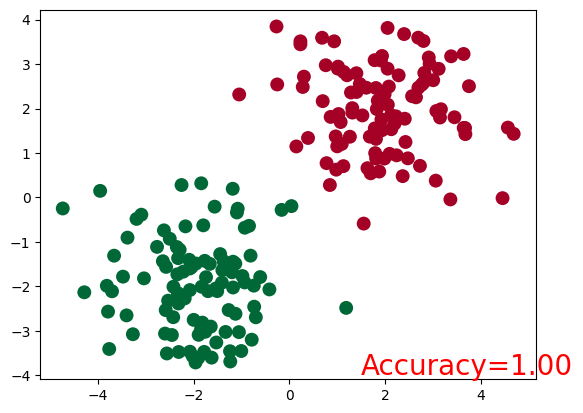

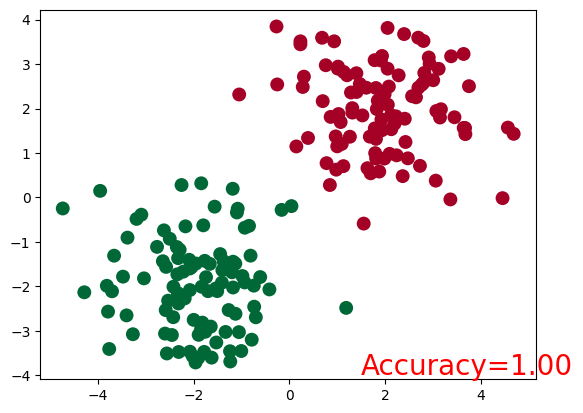

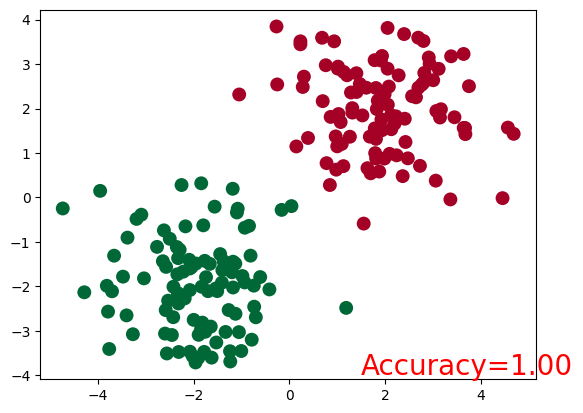

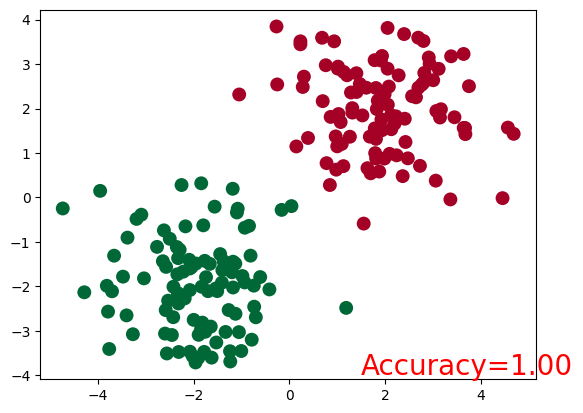

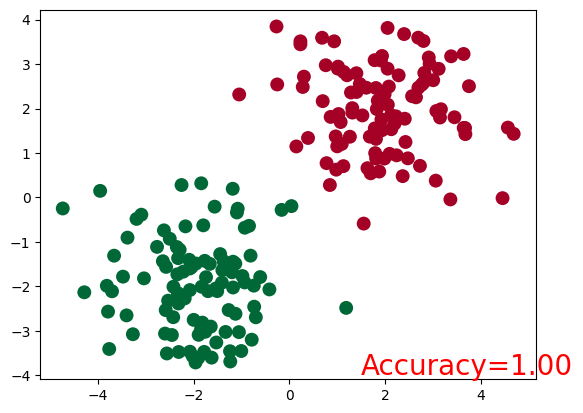

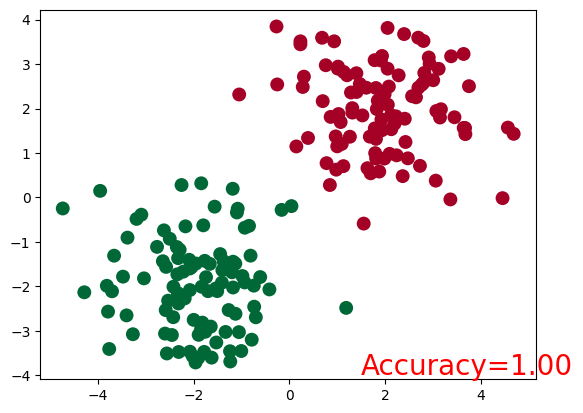

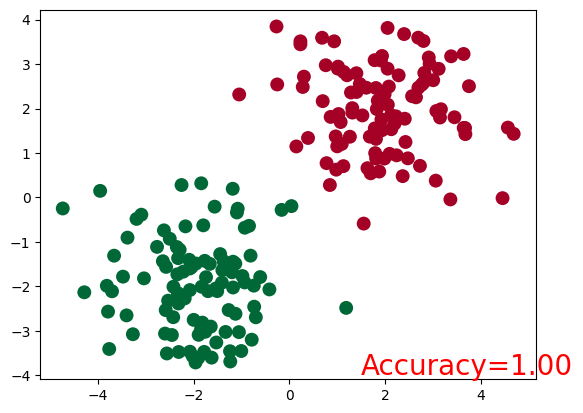

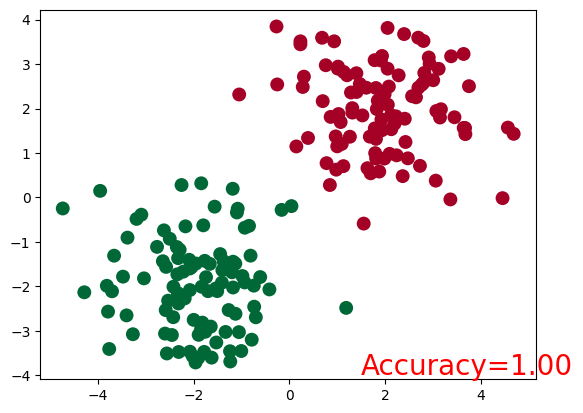

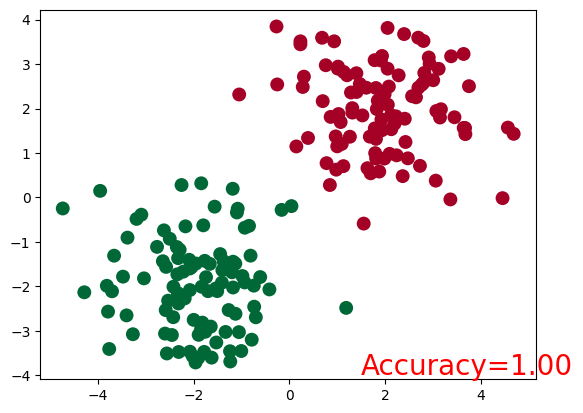

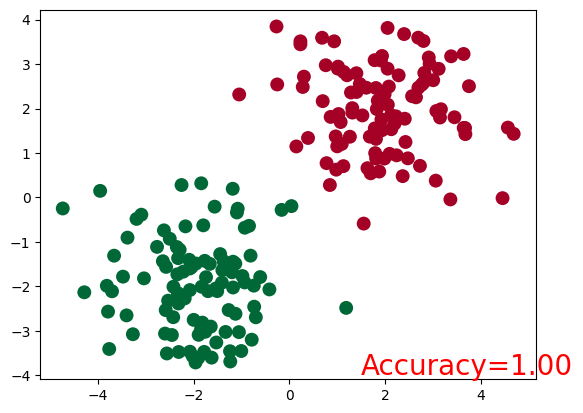

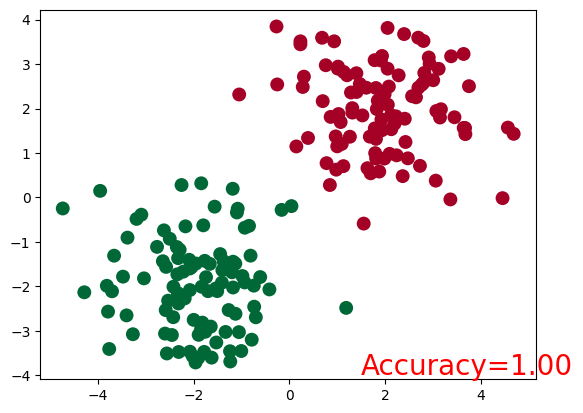

In [9]:
for t in range(100):
    out = net(x)

    loss = loss_func(out,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out),1)[1]
        pred_y = prediction.numpy().squeeze()
        target_y =  y.numpy()
        plt.scatter(x.numpy()[:,0],x.numpy()[:,1],c=pred_y,s=100,lw=0,cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200
        plt.text(1.5,-4,f'Accuracy={accuracy:.2f}',fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()